<a href="https://colab.research.google.com/github/Ali-Kh0/Helmet_Detection/blob/main/YOLOv9m_Helmet_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics roboflow opencv-python matplotlib tqdm gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [ ]:
# @title Downloading Helmet Detection Dataset

from roboflow import Roboflow
rf = Roboflow(api_key="hDys1Coz0MzEKc4wMRcJ")
project = rf.workspace("my-projects-ztgl4").project("helmetdetectiondataset-k1zzh-u8d7i-sttcy-lfkai")
version = project.version(3)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20


Extracting Dataset Version Zip to HelmetDetectionDataset-3 in yolov11:: 100%|██████████| 5318/5318 [00:01<00:00, 5222.37it/s]


In [ ]:
# @title Training YOLOv9m on our dataset


import os
from ultralytics import YOLO
from roboflow import Roboflow


#Verify Data YAML
data_yaml = "/content/extracted_runs/content/drive/MyDrive/runs/data.yaml"


model = YOLO("yolov9m.pt")


model.train(data=data_yaml, epochs=50, imgsz=640, batch=16)


model.val()


results = model.predict(source="/content/HelmetDetectionDataset-3/test/images", save=True)



100%|██████████| 39.1M/39.1M [00:00<00:00, 365MB/s]


Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9m.pt, data=/content/HelmetDetectionDataset-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 112MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1    171648  ultralytics.nn.modules.block.RepNCSPELAN4    [64, 128, 128, 64, 1]         
  3                  -1  1    276960  ultralytics.nn.modules.block.AConv           [128, 240]                    
  4                  -1  1    629520  ultralytics.nn.modules.block.RepNCSPELAN4    [240, 240, 240, 120, 1]       
  5                  -1  1    778320  ultralytics.nn.modules.block.AConv           [240, 360]                    
  6                  -1  1   1414080  ultralytics.nn.modules.block.RepNCSPELAN4    [360, 360, 360, 180, 1]       
  7                  -1  1   1556160  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 314MB/s]


AMP: checks passed ✅


train: Scanning /content/HelmetDetectionDataset-3/train/labels... 2355 images, 267 backgrounds, 0 corrupt: 100%|██████████| 2355/2355 [00:03<00:00, 688.55it/s]


train: New cache created: /content/HelmetDetectionDataset-3/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 30, len(boxes) = 6977. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/HelmetDetectionDataset-3/valid/labels... 214 images, 28 backgrounds, 0 corrupt: 100%|██████████| 214/214 [00:00<00:00, 496.75it/s]

val: New cache created: /content/HelmetDetectionDataset-3/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 497. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 149 weight(decay=0.0), 156 weight(decay=0.0005), 155 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.67G      1.394      1.936      1.576         18        640: 100%|██████████| 148/148 [01:47<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        214        497      0.221       0.57      0.193     0.0812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.45G      1.597      1.873      1.718         13        640: 100%|██████████| 148/148 [01:46<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        214        497      0.496      0.293      0.225      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.43G      1.614      1.901      1.717         16        640: 100%|██████████| 148/148 [01:45<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        214        497      0.569      0.364      0.367      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.41G      1.568      1.785      1.675         26        640: 100%|██████████| 148/148 [01:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        214        497      0.437       0.41      0.251      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.41G      1.493      1.591      1.608         36        640: 100%|██████████| 148/148 [01:45<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        214        497      0.543      0.459      0.457      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.39G      1.454        1.5      1.573         12        640: 100%|██████████| 148/148 [01:46<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        214        497      0.517      0.511      0.474      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.45G      1.401      1.413      1.554         11        640: 100%|██████████| 148/148 [01:46<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        214        497      0.607      0.546       0.52      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.41G      1.368      1.318      1.515         18        640: 100%|██████████| 148/148 [01:45<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        214        497      0.699      0.459      0.521      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.38G      1.336      1.254      1.499         24        640: 100%|██████████| 148/148 [01:43<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        214        497      0.726      0.497       0.59      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.41G        1.3      1.232       1.47          9        640: 100%|██████████| 148/148 [01:45<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        214        497      0.757       0.47      0.584      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       8.4G      1.271      1.154      1.447         20        640: 100%|██████████| 148/148 [01:45<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        214        497      0.775      0.538      0.633      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.46G      1.257      1.138      1.434          6        640: 100%|██████████| 148/148 [01:45<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        214        497      0.693      0.506      0.593      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.46G      1.245      1.091      1.417         14        640: 100%|██████████| 148/148 [01:46<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        214        497      0.736      0.519      0.628      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.42G      1.206      1.066      1.401         13        640: 100%|██████████| 148/148 [01:45<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        214        497      0.718      0.534      0.599      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       8.5G      1.208      1.019      1.385         12        640: 100%|██████████| 148/148 [01:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        214        497      0.777      0.576      0.668       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.41G       1.21      1.025      1.381         59        640: 100%|██████████| 148/148 [01:46<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        214        497      0.827      0.536      0.677      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.38G       1.15     0.9583      1.352          8        640: 100%|██████████| 148/148 [01:46<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        214        497      0.635      0.661      0.675      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.41G      1.142     0.9497      1.341         28        640: 100%|██████████| 148/148 [01:45<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        214        497      0.778      0.589      0.695      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.39G      1.143     0.9262      1.346         11        640: 100%|██████████| 148/148 [01:44<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        214        497       0.73      0.575      0.651      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.37G      1.098     0.8951      1.325         11        640: 100%|██████████| 148/148 [01:46<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]

                   all        214        497      0.701       0.61      0.667      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.39G      1.108     0.8833      1.315         16        640: 100%|██████████| 148/148 [01:45<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        214        497      0.768      0.587      0.687      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.38G      1.097     0.8482      1.305          8        640: 100%|██████████| 148/148 [01:44<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        214        497      0.768      0.555      0.681      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.38G      1.075     0.8384        1.3         18        640: 100%|██████████| 148/148 [01:43<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        214        497      0.805      0.582      0.697      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.41G      1.053      0.802      1.286          4        640: 100%|██████████| 148/148 [01:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        214        497      0.762      0.585      0.697      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       8.5G      1.036     0.7863      1.281         16        640: 100%|██████████| 148/148 [01:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        214        497      0.806       0.58      0.685      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.45G      1.035     0.7857      1.281          9        640: 100%|██████████| 148/148 [01:44<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        214        497      0.767      0.608        0.7      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.46G      1.015     0.7557      1.254         28        640: 100%|██████████| 148/148 [01:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        214        497      0.828      0.554        0.7      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       8.4G     0.9866     0.7503      1.245         13        640: 100%|██████████| 148/148 [01:44<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        214        497      0.828      0.565      0.691      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       8.4G     0.9804     0.7353      1.235         17        640: 100%|██████████| 148/148 [01:44<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        214        497      0.737      0.661      0.709       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.39G     0.9871     0.7309      1.236         10        640: 100%|██████████| 148/148 [01:45<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        214        497      0.839      0.568      0.698      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.49G     0.9402     0.6967      1.217         17        640: 100%|██████████| 148/148 [01:44<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        214        497      0.797       0.61      0.713      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.45G     0.9493     0.6961      1.219          8        640: 100%|██████████| 148/148 [01:44<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        214        497      0.802      0.558        0.7      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.42G     0.9285     0.6698      1.212         23        640: 100%|██████████| 148/148 [01:44<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        214        497      0.844      0.543      0.705      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.38G     0.9253     0.6759      1.196         16        640: 100%|██████████| 148/148 [01:44<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        214        497      0.788      0.582       0.71      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       8.4G     0.9009     0.6543      1.196         13        640: 100%|██████████| 148/148 [01:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        214        497      0.844      0.567      0.699      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.43G     0.9015     0.6485      1.181         10        640: 100%|██████████| 148/148 [01:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        214        497      0.835      0.557      0.708      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.53G     0.8776      0.629      1.171         15        640: 100%|██████████| 148/148 [01:45<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]

                   all        214        497      0.821       0.57      0.715      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.41G     0.8534     0.6121      1.169         13        640: 100%|██████████| 148/148 [01:44<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        214        497      0.814      0.601      0.731      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.47G     0.8511     0.5977      1.156         37        640: 100%|██████████| 148/148 [01:44<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        214        497      0.765      0.617      0.724      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.38G     0.8323      0.585      1.151         19        640: 100%|██████████| 148/148 [01:44<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        214        497      0.741      0.608      0.723      0.524


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.47G       0.84     0.5487      1.125          5        640: 100%|██████████| 148/148 [01:44<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        214        497      0.635       0.66      0.712      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.38G     0.8066      0.512      1.108          3        640: 100%|██████████| 148/148 [01:44<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        214        497      0.811      0.569      0.703      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.39G     0.7955     0.4932      1.096         13        640: 100%|██████████| 148/148 [01:44<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        214        497      0.827      0.576      0.724      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.38G      0.773     0.4764      1.083         13        640: 100%|██████████| 148/148 [01:44<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        214        497      0.789      0.597      0.727      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       8.4G     0.7438     0.4529      1.069         13        640: 100%|██████████| 148/148 [01:44<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        214        497      0.796      0.556        0.7      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.41G     0.7431     0.4554      1.063         18        640: 100%|██████████| 148/148 [01:44<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        214        497       0.81      0.564      0.716      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.36G     0.7229     0.4382      1.053          4        640: 100%|██████████| 148/148 [01:43<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        214        497      0.811       0.58      0.724      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.39G     0.7015     0.4239      1.038          5        640: 100%|██████████| 148/148 [01:43<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        214        497      0.808      0.583      0.716      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       8.4G     0.6877     0.4119      1.036          3        640: 100%|██████████| 148/148 [01:44<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        214        497        0.7      0.625       0.71      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.39G     0.6794     0.4166      1.026          6        640: 100%|██████████| 148/148 [01:44<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        214        497      0.682      0.646      0.709       0.52



50 epochs completed in 1.561 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9m summary (fused): 374 layers, 20,015,161 parameters, 0 gradients, 76.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


                   all        214        497      0.811       0.58      0.724      0.528
                 rider         60         74      0.641      0.811      0.819       0.74
           with helmet        148        291       0.95       0.52      0.727      0.464
        without helmet         70        132      0.844      0.409      0.624       0.38
Speed: 0.4ms preprocess, 13.4ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/train
Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9m summary (fused): 374 layers, 20,015,161 parameters, 0 gradients, 76.5 GFLOPs


val: Scanning /content/HelmetDetectionDataset-3/valid/labels.cache... 214 images, 28 backgrounds, 0 corrupt: 100%|██████████| 214/214 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 497. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.77it/s]


                   all        214        497      0.811       0.58      0.724      0.529
                 rider         60         74       0.64      0.811      0.819      0.744
           with helmet        148        291       0.95      0.521      0.727      0.464
        without helmet         70        132      0.844      0.409      0.624       0.38
Speed: 0.5ms preprocess, 28.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2

image 1/84 /content/HelmetDetectionDataset-3/test/images/43_jpg.rf.31e5f97339657877a38203871c1a685c.jpg: 640x640 1 rider, 16 with helmets, 43.9ms
image 2/84 /content/HelmetDetectionDataset-3/test/images/4751194990015458395-482b6e293083dc4c8f94f5627aaf52fa-22051707_jpg.rf.39dcccc93a1daef7207afa46f82d05d4.jpg: 640x640 (no detections), 39.6ms
image 3/84 /content/HelmetDetectionDataset-3/test/images/4751194990015458395-488368a7bb92cd64260afc2ba8ca76ab-22051708_jpg.rf.4802c068591ec512cd61bf2490ded6d4.jpg: 640x640 (no detect

'runs/detect/train/weights/best.engine'

Detected Images:
PR_curve.png
F1_curve.png
P_curve.png
R_curve.png
confusion_matrix_normalized.png
confusion_matrix.png


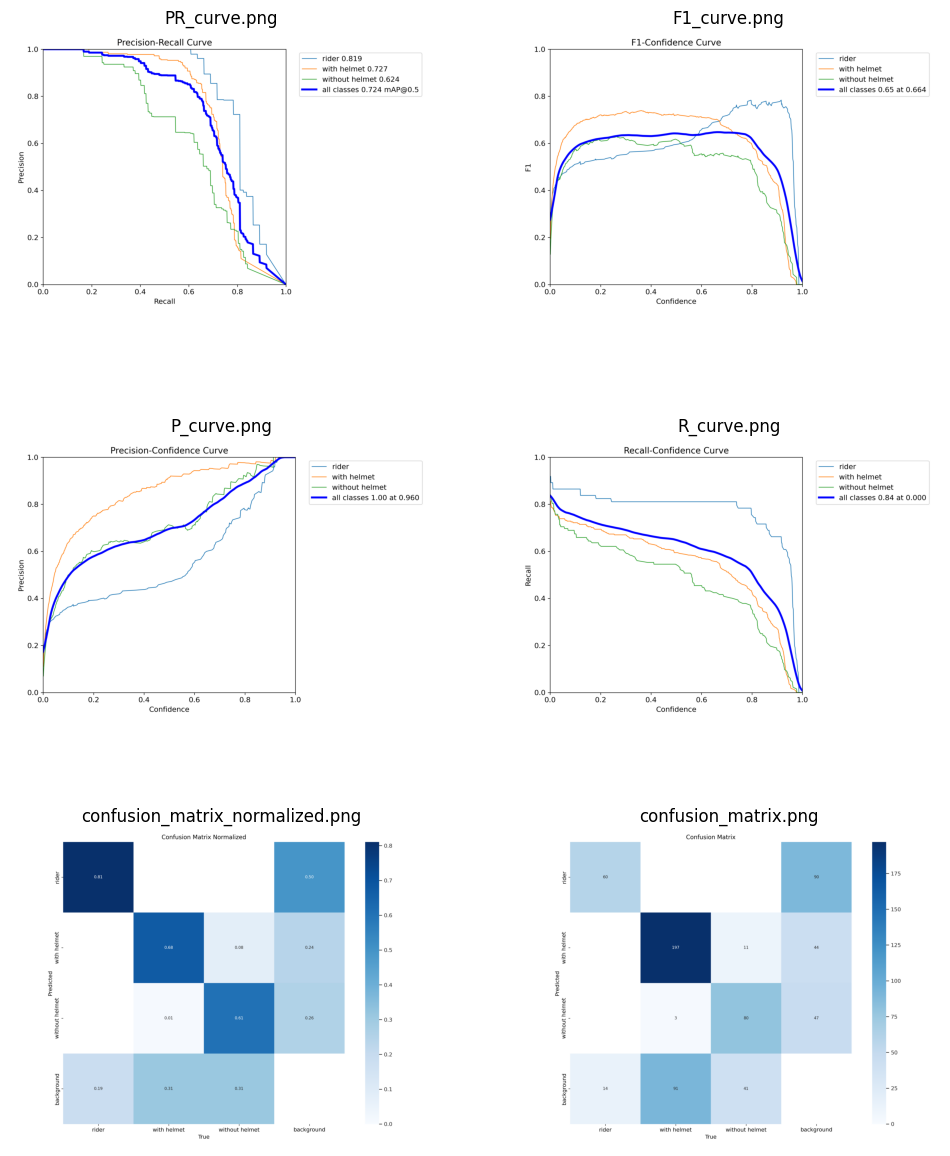

In [ ]:
# @title Showing plots
import os
import cv2
import matplotlib.pyplot as plt

# Define the folder containing YOLO detection results
output_folder = "/content/drive/MyDrive/runs/detect/train2(val)"

# List all image files (PNG, JPG, etc.)
image_files = [f for f in os.listdir(output_folder) if f.endswith((".png"))]


# Display images in 2 columns
if len(image_files) > 0:
    num_images = len(image_files)
    num_rows = (num_images + 1) // 2  # Ensure correct number of rows

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))

    for i, img_file in enumerate(image_files):
        img_path = os.path.join(output_folder, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        ax = axes[i // 2, i % 2] if num_rows > 1 else axes[i % 2]  # Adjust indexing for single-row cases
        ax.imshow(img)
        ax.set_title(img_file)
        ax.axis("off")

    # Hide empty subplots (if images are odd)
    if num_images % 2 == 1:
        axes[-1, -1].axis("off")  # Hide last empty plot if odd number of images
else:
    print("No detection images found in:", output_folder)


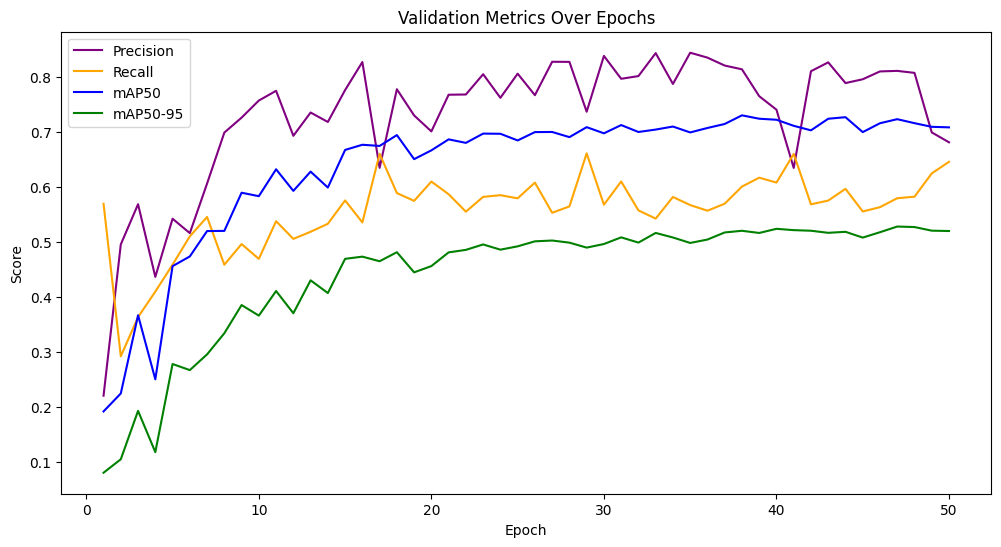

🔥 Best Model Found at Epoch: 47.0
✅ Best Precision: 0.8113
✅ Best Recall: 0.5799
✅ Best mAP50: 0.7236
✅ Best mAP50-95: 0.5285


In [ ]:
# @title Validation metrics
import pandas as pd
import matplotlib.pyplot as plt

# Set path to results.csv
results_csv_path = "/content/drive/MyDrive/runs/detect/train/results.csv"

# Load training results
df = pd.read_csv(results_csv_path)


# Plot Validation Metrics (Precision, Recall, mAP)
plt.figure(figsize=(12, 6))
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision", color="purple")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall", color="orange")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50", color="blue")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95", color="green")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Validation Metrics Over Epochs")
plt.legend()
plt.show()

# Get the epoch where mAP50-95 was highest (best model)
best_epoch = df["metrics/mAP50-95(B)"].idxmax()
best_metrics = df.iloc[best_epoch]

print(f"🔥 Best Model Found at Epoch: {best_metrics['epoch']}")
print(f"✅ Best Precision: {best_metrics['metrics/precision(B)']:.4f}")
print(f"✅ Best Recall: {best_metrics['metrics/recall(B)']:.4f}")
print(f"✅ Best mAP50: {best_metrics['metrics/mAP50(B)']:.4f}")
print(f"✅ Best mAP50-95: {best_metrics['metrics/mAP50-95(B)']:.4f}")


In [1]:
# @title This cell must be run to test the model
!pip install gradio ultralytics opencv-python gdown

!gdown --id 1wGpzAMUBPlkXjxJp3UqOdnB7_JHMBBvb
!unzip "/content/runs.zip" -d "/content/extracted_runs"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

In [18]:
# @title Load the trained model and perform Helmet Detection (Requires execution for testing)

import gradio as gr
import cv2
import os
from ultralytics import YOLO

best_model_path = "/content/extracted_runs/content/drive/MyDrive/runs/detect/train/weights/best.pt"

# Load the trained YOLOv11 model
model = YOLO(best_model_path)

# Function to process an image
def detect_helmet_image(image_path):
    results = model.predict(source=image_path, save=True)
    detected_image_path = results[0].save_dir + "/" + os.path.basename(image_path)
    return detected_image_path

# Main UI function
def process_file(file, file_type):
    if file is None:
        return "Please upload a file."

    if file_type == "Image":
        return detect_helmet_image(file)
   # elif file_type == "Video":
   #     return detect_helmet_video(file)

# Gradio Interface
with gr.Blocks() as demo:
    gr.Markdown("# 🚀 Helmet Detection with YOLOv9m")
    gr.Markdown("**Choose to upload an Image for helmet detection**")

    file_type = gr.Radio(["Image"], label="File Type", value="Image")
    file_input = gr.File(label="Upload Image")
    output = gr.Image(label="Detected Image")  # Default output for images

    def update_output(file, file_type):
        result_path = process_file(file.name, file_type)
        if file_type == "Image":
            return result_path  # Display the processed image

    submit_button = gr.Button("Run Detection")
    submit_button.click(update_output, inputs=[file_input, file_type], outputs=output)

# Launch the UI
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://385d90e4c959eeeed4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [4]:
# @title Helmet Detection on Video
import cv2
import os
import shutil
from ultralytics import YOLO

# Define the path to your trained YOLO model
best_model_path = "/content/extracted_runs/content/drive/MyDrive/runs/detect/train/weights/best.pt"  # Update with your actual model path

# Load the trained YOLO model
model = YOLO(best_model_path)

# Function to process a video
def detect_helmet_video(video_path, output_path="/content/detected_output.mp4"):
    results = model.predict(source=video_path, save=True)

    # Get YOLO's output directory where processed video is saved
    detected_dir = results[0].save_dir
    detected_video = [f for f in os.listdir(detected_dir) if f.endswith(".avi")]

    if detected_video:
        detected_video_path = os.path.join(detected_dir, detected_video[0])

        # Define final output path in Colab directory
        final_avi_path = "/content/detected_output.avi"
        shutil.move(detected_video_path, final_avi_path)

        print(f"Processed video saved at: {final_avi_path}")

        # Convert AVI to MP4
        final_mp4_path = "/content/detected_output.mp4"
        convert_avi_to_mp4(final_avi_path, final_mp4_path)

        print(f"Converted video saved at: {final_mp4_path}")

# Function to Convert AVI to MP4 using OpenCV
def convert_avi_to_mp4(input_path, output_path):
    cap = cv2.VideoCapture(input_path)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # MP4 codec
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        out.write(frame)

    cap.release()
    out.release()
    print(f"Converted AVI to MP4: {output_path}")

# Example Usage
video_file = "/content/Main HelmetMotorcycle.mp4"  # Update with your video file path
detect_helmet_video(video_file)




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/173) /content/Main HelmetMotorcycle.mp4: 640x640 1 with helmet, 1591.7ms
video 1/1 (frame 2/173) /content/Main HelmetMotorcycle.mp4: 640x640 1 with helmet, 1594.7ms
video 1/1 (frame 3/173) /content/Main HelmetMotorcycle.mp4: 640x640 1 with helmet, 1607.0ms
video 1/1 (frame 4/173) /content/Main HelmetMotorcycle.mp4: 640x640 1 with helmet, 1582.8ms
video 1/1 (frame 5/173) /content/Main HelmetMotorcycle.mp4: 640x640 1 with helmet, 2191.